In [357]:
import pandas as pd

In [358]:
df = pd.read_csv('../data/internet_service_churn_scaled.csv')

In [359]:
df_X = df.drop(['churn'], axis=1)
df_y = df['churn']

In [360]:
df_X.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,reamining_contract,download_avg,upload_avg,download_over_limit
0,0.476083,-0.708273,4.684387,-0.537157,-0.556575,-0.192699,-0.208788
1,-2.100476,-0.708273,2.844086,-0.747446,-0.689055,-0.426943,-0.208788
2,0.476083,-0.708273,3.184517,-0.747446,-0.472986,-0.335282,-0.208788
3,-2.100476,-0.708273,2.178025,-0.747446,-0.689055,-0.426943,-0.208788
4,-2.100476,-0.708273,1.941204,-0.747446,-0.689055,-0.426943,-0.208788


In [361]:
df[df['is_tv_subscriber'] > 0]['churn'].value_counts(), df[df['is_movie_package_subscriber'] > 0]['churn'].value_counts()

(churn
 0.0    30525
 1.0    28084
 Name: count, dtype: int64,
 churn
 0.0    15822
 1.0     8195
 Name: count, dtype: int64)

In [362]:
df_y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: churn, dtype: float64

### Тренування моделі

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [364]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

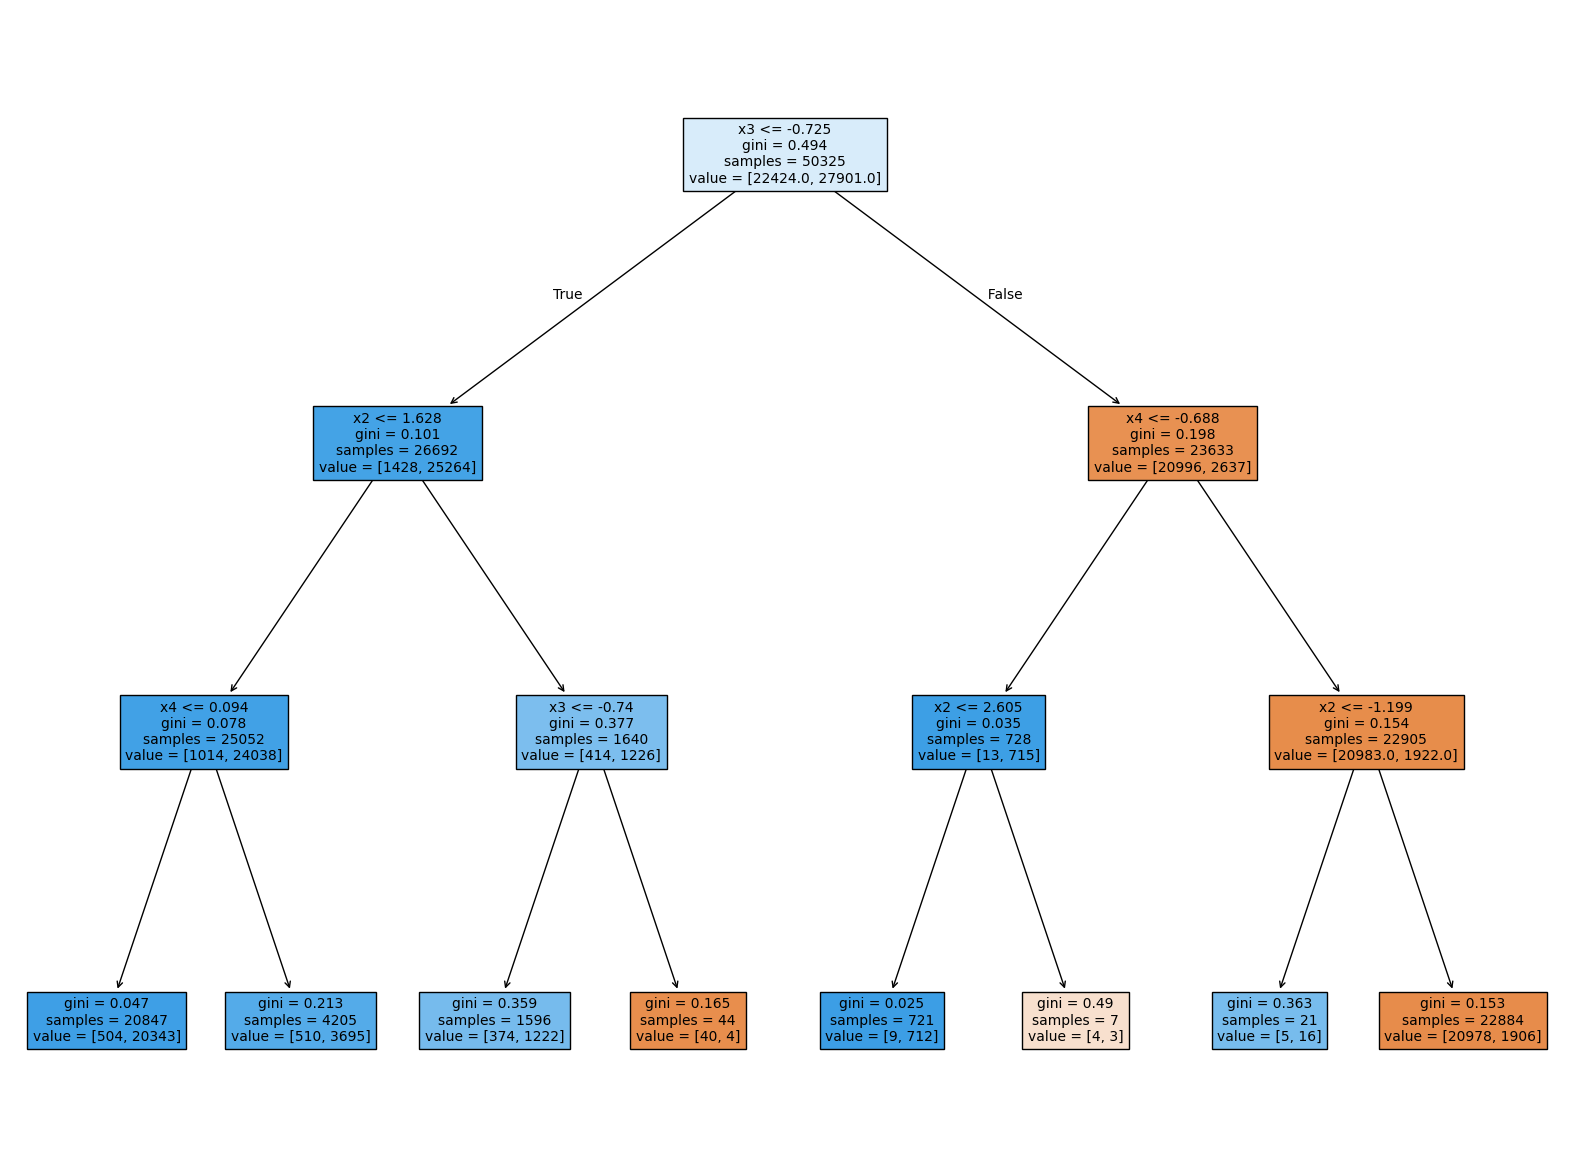

In [365]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

_, ax = plt.subplots(figsize=(20, 15)) 
plot_tree(tree, feature_names=[f'x{i}' for i in range(5)], filled=True, fontsize=10, ax=ax)
plt.show()

In [366]:
y_pred_forest = tree.predict_proba(X_test)

In [367]:
y_pred_forest[:5]

array([[0.91671037, 0.08328963],
       [0.91671037, 0.08328963],
       [0.02417614, 0.97582386],
       [0.02417614, 0.97582386],
       [0.91671037, 0.08328963]])

In [368]:
y_pred_forest = tree.predict(X_test)
y_pred_forest[:5]

array([0., 0., 1., 1., 0.])

In [369]:
y_test.head()

50303    0.0
32197    0.0
35835    1.0
61761    1.0
35715    1.0
Name: churn, dtype: float64

In [370]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9419
         1.0       0.95      0.93      0.94     12149

    accuracy                           0.94     21568
   macro avg       0.93      0.94      0.93     21568
weighted avg       0.94      0.94      0.94     21568



In [371]:
import pickle

with open('../models/decision_tree.pkl', 'wb') as f:
    pickle.dump(tree, f)

In [372]:
# check loaded model
with open('../models/decision_tree.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    y_pred_forest = tree.predict(X_test)
    print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9419
         1.0       0.95      0.93      0.94     12149

    accuracy                           0.94     21568
   macro avg       0.93      0.94      0.93     21568
weighted avg       0.94      0.94      0.94     21568

